# Monte Carlo simulations

  Monte Carlo methods and simulations are philosophically related to and often incorporated into agent-based models.  In the words of [Wiki](http://en.wikipedia.org/wiki/Monte_Carlo_method#Definitions):
  > Sawilowsky[9] distinguishes between a simulation, a Monte Carlo method, and a Monte Carlo simulation: a simulation is a 
  > fictitious representation of reality, a Monte Carlo method is a technique that can be used to solve a mathematical or
  > statistical problem, and a Monte Carlo simulation uses repeated sampling to determine the properties of some phenomenon (or
  > behavior). Examples:
  >     * Simulation: Drawing one pseudo-random uniform variable from the interval [0,1] can be used to simulate the tossing of a coin: If the value is less than or equal to 0.50 designate the outcome as heads, but if the value is greater than 0.50 designate the outcome as tails. This is a simulation, but not a Monte Carlo simulation.
  
  >     * Monte Carlo method: Pouring out a box of coins on a table, and then computing the ratio of coins that land heads versus tails is a Monte Carlo method of determining the behavior of repeated coin tosses, but it is not a simulation.
  
  >     * Monte Carlo simulation: Drawing a large number of pseudo-random uniform variables from the interval [0,1], and assigning values less than or equal to 0.50 as heads and greater than 0.50 as tails, is a Monte Carlo simulation of the behavior of repeatedly tossing a coin.

## First hitting time simulations

  One classic problem in ecology and finance is __hitting time__, __stopping time__, or __passage time__ problem.  In [the first hitting time](http://en.wikipedia.org/wiki/First-hitting-time_model) problem, one models the state of some variable over time until it hits a certain condition, at which point the process stops.   
  
  For example, one might model the level of some renewable resource like a forest or fishery.  So long as the resource level is greater than zero, the resource can continue to regenerate; however, if at any point the "last" unit of the resource is extracted, then the resource dies.  Thus, we might simulate the survival of our resource under certain dynamics of growth or extraction.  Let's walk few examples below.


## Uniform arithmetic growth and extraction

  In our first example, let's start by simulating a single forest under the following assumptions:

  * The forest starts with ``initial_resource`` units of forest.
  * Each turn, we sample a continuous random value in ``[min_consumption, max_consumption)`` for extraction.  We decrease the forest by subtracting this amount.
  * Each turn, we also sample a continuous random value in ``[min_growth, max_growth)`` for growth.  We increase the forest by adding this amount.

In [1]:
# Imports
import numpy
import matplotlib.pyplot as plt

import seaborn; seaborn.set()

# Import widget methods
from IPython.html.widgets import *

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
# Set model parameters
initial_resource = 10
min_consumption = 2
max_consumption = 3
min_growth = 2
max_growth = 3

# Set model state variables
current_resource = initial_resource
resource_history = [current_resource]
growth_history = []
consumption_history = []

# Continue running until the resource hits at or below zero
while current_resource > 0:
    # Sample growth
    growth = numpy.random.uniform(min_growth, max_growth)
    
    # Sample consumption
    consumption = numpy.random.uniform(min_consumption, max_consumption)
    
    # Change forest resource level
    current_resource += growth - consumption
    
    # Keep track of history
    resource_history.append(current_resource)
    growth_history.append(growth)
    consumption_history.append(consumption)

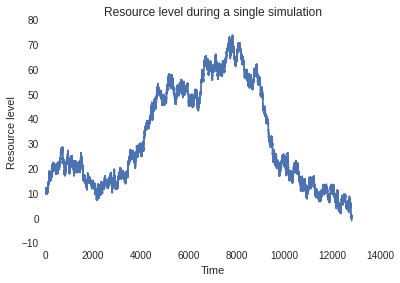

In [3]:
%matplotlib inline

# Plot the time series for each component
f = plt.figure()
plt.plot(resource_history)
plt.xlabel('Time')
plt.ylabel('Resource level')
plt.title('Resource level during a single simulation')

## Interactive simulation

  Let's practice wrapping our simulation in a method so that we can create an interactive applet.

<function __main__.run_simulation>

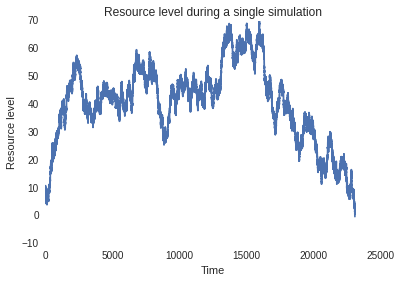

In [4]:
def run_simulation(initial_resource = 10, min_consumption = 2, max_consumption = 3, min_growth = 2, max_growth = 3):
    """
    Simulate a resource under uniform arithmetic growth and consumption.
    """

    # Set model state variables
    current_resource = initial_resource
    resource_history = [current_resource]
    growth_history = []
    consumption_history = []

    # Continue running until the resource hits at or below zero
    while current_resource > 0:
        # Sample growth
        growth = numpy.random.uniform(min_growth, max_growth)

        # Sample consumption
        consumption = numpy.random.uniform(min_consumption, max_consumption)

        # Change forest resource level
        current_resource += growth - consumption

        # Keep track of history
        resource_history.append(current_resource)
        growth_history.append(growth)
        consumption_history.append(consumption)
    
    # Plot the time series for each component
    f = plt.figure()
    plt.plot(resource_history)
    plt.xlabel('Time')
    plt.ylabel('Resource level')
    plt.title('Resource level during a single simulation')

# Call the ipython interact() method to allow us to explore the parameters and sampling
interact(run_simulation, initial_resource=(1, 1000),
         min_consumption = (0, 20),
         max_consumption = (0, 20),
         min_growth = (0, 20),
         max_growth = (0, 20))